# Wifi

In [1]:
import numpy as np
import pandas as pd
import fanalysis
from fanalysis.ca import CA

## Importation des données

In [2]:
dtype = {'Code Site': 'category', 
         'Nom du site': str, 
         'Code postal': 'category', 
         "Type d'appareil":'category', 'Nombre de borne': int, 
         'Adresse': str, 'Langue utilisateur': 'category', 
         'Version navigateur': 'category', 
         'Version système exploitation': 'category', 
         'Constructeur appareil': 'category'}

In [46]:
df = pd.read_csv("./data/paris-wi-fi-utilisation-des-hotspots-paris-wi-fi.csv", sep=";", dtype=dtype)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627738 entries, 0 to 1627737
Data columns (total 25 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   Code Site                     1612801 non-null  category
 1   Date heure début              1627738 non-null  object  
 2   Date heure fin                1627738 non-null  object  
 3   Temps de session en secondes  1627738 non-null  int64   
 4   Temps de sessions en minutes  1627738 non-null  float64 
 5   Nom du site                   1627738 non-null  object  
 6   Code postal                   1624015 non-null  category
 7   Type d'appareil               1627738 non-null  category
 8   Constructeur appareil         1627738 non-null  category
 9   Version système exploitation  1551296 non-null  category
 10  Version navigateur            1585808 non-null  category
 11  Donnée entrante (Octet)       1627738 non-null  int64   
 12  Donnée entrant

In [48]:
# To limit the size
df_ = df.sample(3000)

**Remove duplicate columns**

In [6]:
del df['Date heure fin']
del df['Donnée entrante (Octet)']
del df['Donnée sortante (Octet)']
del df['Code postal.1']
del df['Nom du site.1']
del df['Temps de session en secondes']

**Remove useless columns**

**Convert time columns**

In [7]:
df['Date heure début'] = pd.to_datetime(df['Date heure début'])

## Observation des données

In [8]:
len(df)

3000

In [9]:
df.columns

Index(['Code Site', 'Date heure début', 'Temps de sessions en minutes',
       'Nom du site', 'Code postal', 'Type d'appareil',
       'Constructeur appareil', 'Version système exploitation',
       'Version navigateur', 'Donnée entrante (MégaOctet)',
       'Donnée sortante (MégaOctet)', 'Paquets entrants', 'Paquets sortants',
       'Langue utilisateur', 'geo_shape', 'geo_point_2d', 'Etat du site',
       'Adresse', 'Nombre de bornes'],
      dtype='object')

In [10]:
df.sample(10)

,Code Site,Date heure début,Temps de sessions en minutes,Nom du site,Code postal,Type d'appareil,Constructeur appareil,Version système exploitation,Version navigateur,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Langue utilisateur,geo_shape,geo_point_2d,Etat du site,Adresse,Nombre de bornes
182961,PW0188,2021-06-01 16:46:06+02:00,21.983333,SQ SERMENT DE KOUFRA,75014,Mobile,Apple,iOS 11.4.1,Safari unknown,27.252702,2.321070,24621,24356,Français,"{""type"": ""Point"", ""coordinates"": [2.3230349822...","48.8215934539,2.32303498218",Opérationnel,30 AVENUE ERNEST REYER,1.0
827575,PW0021,2019-11-09 13:26:48+01:00,19.516667,MAIRIE DU 5 EME,75005,Mobile,Samsung,inconnu,Chrome 77.0,23.880631,3.921942,18412,18425,Français,"{""type"": ""Point"", ""coordinates"": [2.3445808787...","48.846191709,2.3445808787",Opérationnel,21 PLACE DU PANTHEON,2.0
393458,PW0083,2019-11-15 17:29:30+01:00,1.333333,CS JULES LADOUMEGUE,75019,Mobile,autre,inconnu,Chrome 78.0,1.157338,0.253805,1372,1272,Français,"{""type"": ""Point"", ""coordinates"": [2.397787507,...","48.893005177,2.39778750696",Opérationnel,37 ROUTE DES PETITS PONTS,1.0
339906,PW0045,2021-08-12 09:16:19+02:00,8.250000,BIB MARGUERITE DURAS,75020,Mobile,autre,inconnu,inconnu,0.022971,0.009219,64,91,Français,"{""type"": ""Point"", ""coordinates"": [2.4032269985...","48.8598387687,2.40322699854",Opérationnel,109-115 RUE DE BAGNOLET,11.0
1329573,PW0071,2020-12-08 09:33:21+01:00,120.250000,CS ALFRED NAKACHE,75020,Mobile,autre,inconnu,Chrome 86.0,32.594457,3.499516,24585,27245,Français,"{""type"": ""Point"", ""coordinates"": [2.3786770353...","48.8714830648,2.37867703535",Opérationnel,4/12 RUE DENOYEZ,1.0
1586189,PW0199,2019-09-08 19:37:00+02:00,34.400000,SQ CLAUDE NICOLAS LEDOUX,75014,Mobile,Apple,iOS 12.4,Safari unknown,37.974218,3.382328,29764,33850,Anglais,"{""type"": ""Point"", ""coordinates"": [2.3321285183...","48.8342318805,2.33212851833",Opérationnel,2 PLACE DENFERT ROCHEREAU,2.0
1030087,PW0032,2021-09-15 14:41:01+02:00,49.850000,MVAC 18,75018,Ordinateur,autre,Windows 10,Chrome 93.0,6.533833,1.271468,7813,6521,Français,"{""type"": ""Point"", ""coordinates"": [2.3473354971...","48.890069083,2.34733549712",Opérationnel,15 PASSAGE RAMEY,3.0
1436357,PW0104,2021-02-21 14:52:06+01:00,120.166667,BIB EDMOND ROSTAND,75017,Ordinateur,Apple,Mac OS X 10.13.6,inconnu,669.324134,32.700932,446205,528443,NaN,"{""type"": ""Point"", ""coordinates"": [2.3030897057...","48.8883943592,2.30308970568",Opérationnel,11 RUE NICOLAS CHUQUET,3.0
157125,PW0082,2020-02-10 15:15:55+01:00,120.950000,CS JEAN DAME,75002,Mobile,autre,inconnu,Chrome 80.0,495.061445,19.963748,315172,293820,Français,"{""type"": ""Point"", ""coordinates"": [2.3455065053...","48.8665683485,2.34550650532",Opérationnel,17 RUE LEOPOLD BELLAN,1.0
1608697,PW0205,2020-02-22 22:39:41+01:00,6.033333,SQ MAURICE GARDETTE,75011,Mobile,Apple,iOS 12.3.1,Safari unknown,27.247644,3.317588,19385,25977,Français,"{""type"": ""Point"", ""coordinates"": [2.3790725171...","48.8610851934,2.37907251705",Opérationnel,2 RUE DU GENERAL BLAISE RUE LACHARRIERE,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 840517 to 23189
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Code Site                     2965 non-null   category
 1   Date heure début              3000 non-null   object  
 2   Temps de sessions en minutes  3000 non-null   float64 
 3   Nom du site                   3000 non-null   object  
 4   Code postal                   2993 non-null   category
 5   Type d'appareil               3000 non-null   category
 6   Constructeur appareil         3000 non-null   category
 7   Version système exploitation  2854 non-null   category
 8   Version navigateur            2926 non-null   category
 9   Donnée entrante (MégaOctet)   3000 non-null   float64 
 10  Donnée sortante (MégaOctet)   3000 non-null   float64 
 11  Paquets entrants              3000 non-null   int64   
 12  Paquets sortants              3000 non-nul

### Removing rows with missing values

In [12]:
df = df.dropna(how='any')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2639 entries, 840517 to 23189
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Code Site                     2639 non-null   category
 1   Date heure début              2639 non-null   object  
 2   Temps de sessions en minutes  2639 non-null   float64 
 3   Nom du site                   2639 non-null   object  
 4   Code postal                   2639 non-null   category
 5   Type d'appareil               2639 non-null   category
 6   Constructeur appareil         2639 non-null   category
 7   Version système exploitation  2639 non-null   category
 8   Version navigateur            2639 non-null   category
 9   Donnée entrante (MégaOctet)   2639 non-null   float64 
 10  Donnée sortante (MégaOctet)   2639 non-null   float64 
 11  Paquets entrants              2639 non-null   int64   
 12  Paquets sortants              2639 non-nul

In [14]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [15]:
df.describe()

,Temps de sessions en minutes,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Nombre de bornes
count,2639.0,2639.0,2639.0,2639.0,2639.0,2639.0
mean,38.7,62.2,8.9,50808.6,50061.3,3.3
std,40.1,120.6,28.5,92139.3,90228.9,3.9
min,0.0,0.0,0.0,0.0,0.0,1.0
25%,6.9,4.7,0.7,4570.0,4928.0,1.0
50%,20.7,19.8,2.7,18082.0,18811.0,2.0
75%,61.7,67.5,8.4,57750.0,58280.0,4.0
max,124.8,2891.1,878.1,2179581.0,2062077.0,32.0


In [16]:
df.corr().style.background_gradient()

,Temps de sessions en minutes,Donnée entrante (MégaOctet),Donnée sortante (MégaOctet),Paquets entrants,Paquets sortants,Nombre de bornes
Temps de sessions en minutes,1.000000,0.497191,0.263861,0.544713,0.529925,0.046562
Donnée entrante (MégaOctet),0.497191,1.000000,0.250157,0.807677,0.779453,0.015003
Donnée sortante (MégaOctet),0.263861,0.250157,1.000000,0.455365,0.530308,0.002039
Paquets entrants,0.544713,0.807677,0.455365,1.000000,0.980229,0.019783
Paquets sortants,0.529925,0.779453,0.530308,0.980229,1.000000,0.014300
Nombre de bornes,0.046562,0.015003,0.002039,0.019783,0.014300,1.000000


### a. Différents sites

In [17]:
df_sites = df.groupby('Code Site').count()['Date heure début']
df_sites.describe()

count   263.0
mean     10.0
std      12.8
min       0.0
25%       3.0
50%       6.0
75%      12.5
max     106.0
Name: Date heure début, dtype: float64

<AxesSubplot:ylabel='Frequency'>

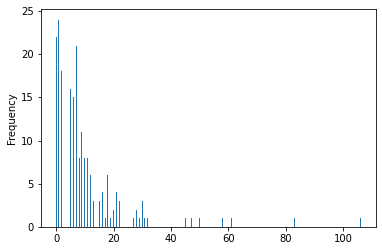

In [18]:
df_sites.plot.hist(bins = 400)

### b. Getting week days

In [19]:
a = df['Date heure début']

In [20]:
df['Jour'] = df['Date heure début'].apply(lambda x: x.weekday())

### c. Add a category for time during the day

### Statistics on categorical attributes

In [21]:
df.select_dtypes('category').describe()

,Code Site,Code postal,Type d'appareil,Constructeur appareil,Version système exploitation,Version navigateur,Langue utilisateur
count,2639,2639,2639,2639,2639,2639,2639
unique,241,20,4,10,128,89,16
top,PW0045,75004,Mobile,autre,inconnu,Safari unknown,Français
freq,106,330,2077,1406,907,702,1979


In [44]:
df["Type d'appareil"].unique()
df["Type d'appareil"].groupby("Type d'appareil")

['Ordinateur', 'Mobile', 'Tablette', 'Computer']
Categories (4, object): ['Ordinateur', 'Mobile', 'Tablette', 'Computer']

In [49]:
df.groupby("Type d'appareil").count()['Code Site']

Type d'appareil
Mobile        1275193
Ordinateur     302505
Tablette        33311
Computer         1420
Tablet            372
Name: Code Site, dtype: int64

In [58]:
def f(category):
    if category == "Computer":
        return "Ordinateur"
    elif category == "Tablet":
        return "Tablette"
    else:
        return category

df["Type d'appareil"].apply(f)

0              Mobile
1              Mobile
2              Mobile
3              Mobile
4              Mobile
              ...    
1627733    Ordinateur
1627734        Mobile
1627735        Mobile
1627736        Mobile
1627737        Mobile
Name: Type d'appareil, Length: 1627738, dtype: object

### AFC - Code Postal / Marque du constructeur

Describe the two categorical attributes

In [22]:
df_1 = df[['Code postal', "Constructeur appareil"]]

In [23]:
df_1.describe()

,Code postal,Constructeur appareil
count,2639,2639
unique,20,10
top,75004,autre
freq,330,1406


In [24]:
df_1["Constructeur appareil"].unique()

['Apple', 'autre', 'Samsung', 'LG', 'Nokia', 'HUAWEI', 'other', 'Asus', 'HTC', 'RIM']
Categories (10, object): ['Apple', 'autre', 'Samsung', 'LG', ..., 'other', 'Asus', 'HTC', 'RIM']

In [25]:
df_1['Code postal'].unique()

['75004', '75010', '75001', '75015', '75013', ..., '75012', '75009', '75003', '75002', '75006']
Length: 20
Categories (20, object): ['75004', '75010', '75001', '75015', ..., '75009', '75003', '75002', '75006']

In [26]:
tableau = pd.crosstab(df['Code postal'], df["Constructeur appareil"])
tableau

Constructeur appareil,Apple,Asus,HTC,HUAWEI,LG,Nokia,RIM,Samsung,autre,other
Code postal,,,,,,,,,,
75001,77,2,0,5,1,1,0,15,92,0
75002,5,2,0,0,0,0,0,1,14,2
75003,19,0,0,4,2,1,0,4,23,0
75004,149,2,0,4,0,0,0,26,149,0
75005,22,0,0,1,0,1,0,5,39,0
75006,5,0,0,0,0,0,0,0,15,0
75007,34,0,0,2,0,0,0,14,45,0
75008,34,0,0,3,1,3,0,6,40,0
75009,22,0,0,0,0,0,0,8,31,0


### AFC

In [27]:
X = tableau.to_numpy()

In [28]:
my_ca = CA(row_labels=tableau.index.values, col_labels=tableau.columns.values)

In [29]:
my_ca

CA(col_labels=['Apple', 'Asus', 'HTC', 'HUAWEI', 'LG', 'Nokia', 'RIM', 'Samsung', 'autre', 'other']
Categories (12, object): ['ARCHOS', 'Apple', 'Asus', 'HTC', ..., 'Samsung', 'Sony', 'autre', 'other'],
   row_labels=['75001', '75002', '75003', '75004', '75005', ..., '75016', '75017', '75018', '75019', '75020']
Length: 20
Categories (24, object): ['75001', '75002', '75003', '75004', ..., '92100', 'MUSEE DE LA LIBERATION', 'MUSEE CARNAVALET', 'MAISON VICTOR HUGO'])

In [30]:
my_ca.fit(X)

CA(col_labels=['Apple', 'Asus', 'HTC', 'HUAWEI', 'LG', 'Nokia', 'RIM', 'Samsung', 'autre', 'other']
Categories (12, object): ['ARCHOS', 'Apple', 'Asus', 'HTC', ..., 'Samsung', 'Sony', 'autre', 'other'],
   row_labels=['75001', '75002', '75003', '75004', '75005', ..., '75016', '75017', '75018', '75019', '75020']
Length: 20
Categories (24, object): ['75001', '75002', '75003', '75004', ..., '92100', 'MUSEE DE LA LIBERATION', 'MUSEE CARNAVALET', 'MAISON VICTOR HUGO'])

In [31]:
my_ca.eig_

array([[4.45846756e-02, 2.93066273e-02, 1.72030087e-02, 1.09301337e-02,
        8.88667112e-03, 7.27015293e-03, 6.76742385e-03, 4.13745559e-03,
        1.77985187e-03],
       [3.40689525e+01, 2.23943783e+01, 1.31455142e+01, 8.35215693e+00,
        6.79066455e+00, 5.55541768e+00, 5.17126207e+00, 3.16159703e+00,
        1.36005674e+00],
       [3.40689525e+01, 5.64633308e+01, 6.96088450e+01, 7.79610019e+01,
        8.47516665e+01, 9.03070842e+01, 9.54783462e+01, 9.86399433e+01,
        1.00000000e+02]])

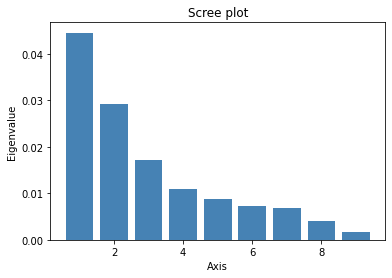

In [32]:
my_ca.plot_eigenvalues()

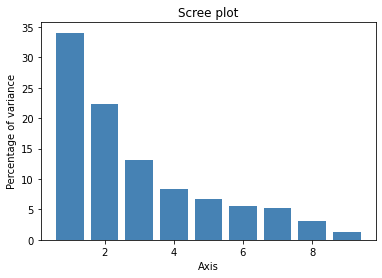

In [33]:
my_ca.plot_eigenvalues(type="percentage")

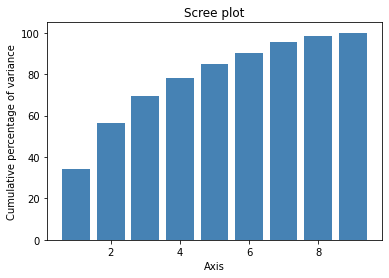

In [34]:
my_ca.plot_eigenvalues(type="cumulative")

In [35]:
df_rows = my_ca.row_topandas()

In [36]:
print(df_rows)

       row_coord_dim1  row_coord_dim2  row_coord_dim3  row_coord_dim4  \
75001            -0.1             0.1            -0.0             0.1   
75002             1.6             1.0            -0.0            -0.2   
75003            -0.3             0.2             0.5            -0.0   
75004            -0.1             0.1            -0.2             0.0   
75005            -0.0            -0.1             0.0             0.0   
75006             0.2            -0.3             0.1             0.2   
75007            -0.1            -0.0            -0.2            -0.1   
75008            -0.2             0.1             0.3             0.0   
75009            -0.1            -0.1            -0.2            -0.0   
75010             0.1            -0.0            -0.0            -0.1   
75011             0.2             0.1             0.0             0.2   
75012            -0.1            -0.1            -0.1            -0.1   
75013             0.1            -0.1             0

In [37]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[-6.39910439e-02  1.01650192e-01 -3.38857730e-02  7.30631960e-02
   5.75820360e-02  4.77963138e-03 -2.86388623e-02  3.60083982e-03
   1.84319829e-02]
 [ 1.55374681e+00  1.04855428e+00 -1.13071665e-02 -2.47642187e-01
  -1.27902298e-02  1.55175866e-01 -5.58130643e-02  1.88280859e-02
  -1.49063123e-02]
 [-3.38376509e-01  1.99256466e-01  5.13605263e-01 -3.96401191e-02
   1.94705390e-01  2.66759823e-01 -6.23072261e-02 -2.99814951e-02
   1.47137914e-03]
 [-1.01800928e-01  8.24682211e-02 -1.91012174e-01  4.49534023e-02
   1.18539635e-02 -8.55905744e-03  3.49389888e-02  3.05849796e-02
   2.45356442e-02]
 [-2.20367856e-02 -8.25887552e-02  4.44208677e-02  3.92816531e-02
  -1.30220762e-01 -7.08863441e-02 -1.15127409e-02 -2.91734050e-02
  -2.40128337e-02]
 [ 2.11940342e-01 -2.91963813e-01  7.19035555e-02  1.63640137e-01
  -7.51359231e-02 -1.45110738e-02  2.41980254e-01  5.58753301e-02
  -5.91403382e-02]
 [-1.12453361e-01 -4.19862765e-02 -1.67037112e-01 -8.80051132e-02
   2.33590768e-02  2.1383937

In [38]:
# Contributions des points lignes
print(my_ca.row_contrib_.round(1))

[[ 0.7  2.6  0.5  3.6  2.7  0.   0.9  0.   1.4]
 [49.2 34.1  0.   5.1  0.   3.   0.4  0.1  0.1]
 [ 5.2  2.7 30.8  0.3  8.6 19.7  1.2  0.4  0. ]
 [ 2.9  2.9 26.5  2.3  0.2  0.1  2.3  2.8  4.2]
 [ 0.   0.6  0.3  0.4  4.9  1.8  0.1  0.5  0.8]
 [ 0.8  2.2  0.2  1.9  0.5  0.   6.6  0.6  1.5]
 [ 1.   0.2  5.8  2.6  0.2  0.2  8.5 23.6  0.2]
 [ 4.2  2.3 14.   0.2 11.9  1.4  4.3  0.9  0. ]
 [ 0.2  0.5  5.8  0.1  1.3  1.5  2.   7.2  0.6]
 [ 1.6  0.1  0.3 11.7  0.   0.   5.8  9.   2.9]
 [ 5.6  1.5  0.4 31.6  6.9  7.4  4.7  0.4  0.8]
 [ 0.2  2.4  1.5  7.4  6.1  0.5 12.7 28.8 36.4]
 [ 0.9  2.6  3.6  7.8  5.3  0.7  0.1  1.6  5.7]
 [ 1.1  1.6  1.4  0.3  0.   1.5 40.1  2.8  3.4]
 [ 0.5  2.1  1.7  3.1 19.4  9.3  0.9  0.   0. ]
 [ 8.   3.7  3.5  0.3  5.3 30.6  0.   3.5  0.3]
 [ 4.7  4.   0.1  7.6  0.2  0.6  0.9  6.2  4.9]
 [ 2.   0.   2.   1.8 26.1  2.   2.3  6.3  0.2]
 [ 2.   3.7  0.8  5.8  0.  17.7  2.6  0.4  2. ]
 [ 9.2 30.   0.7  6.3  0.2  1.8  3.7  4.8 34.5]]


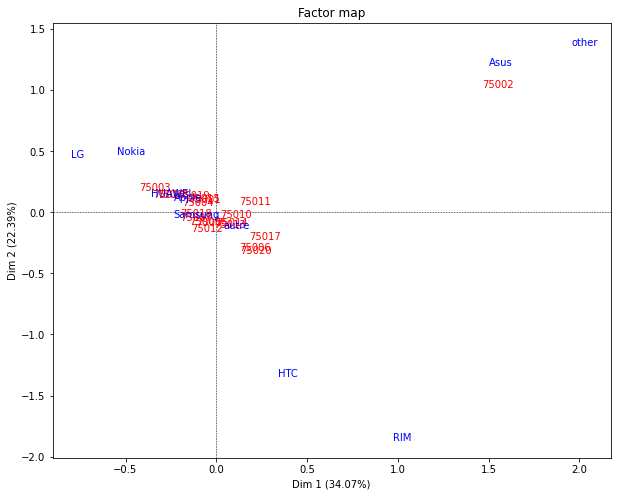

In [39]:
my_ca.mapping(1, 2, figsize=(10, 8))

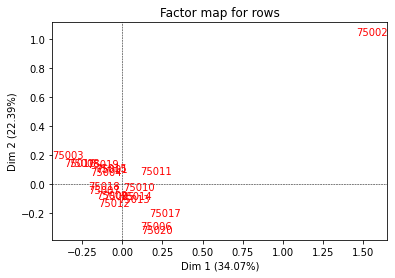

In [40]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)